In [2]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


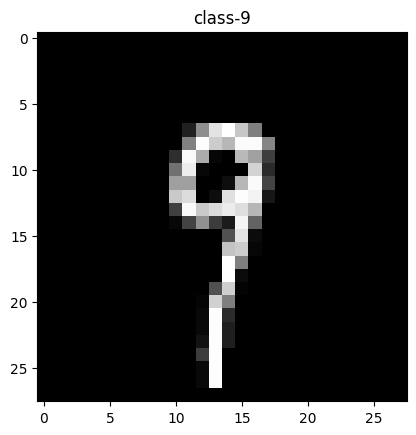

Train image 24914-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  33 142 227 255 199 127   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [3]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = 'C:/Users/Achilles2000/Desktop/mds_mnist_data_anurag_joardar_no1/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



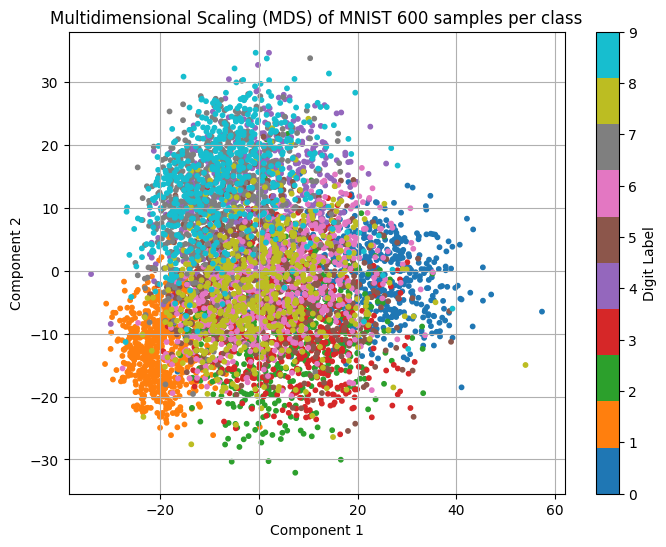

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def pairwise_distances(data):
    num_samples = len(data)
    distances = np.zeros((num_samples, num_samples))
    for i in range(num_samples):
        for j in range(i+1, num_samples):
            distances[i][j] = euclidean_distance(data[i], data[j])
            distances[j][i] = distances[i][j]
    return distances

def centering_matrix(n):
    H = np.eye(n) - np.ones((n, n)) / n
    return H

def classical_mds(distances, n_components=2):
    n = distances.shape[0]
    H = centering_matrix(n)
    B = -0.5 * H @ distances**2 @ H
    eigvals, eigvecs = np.linalg.eigh(B)
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    return np.real(eigvecs[:, :n_components] @ np.sqrt(np.diag(eigvals[:n_components])))

class_indices = [[] for _ in range(10)]

for i, label in enumerate(train_labels):
    class_indices[label].append(i)

selected_indices = []
for indices in class_indices:
    if len(indices) >= 600:
        selected_indices.extend(np.random.choice(indices, size=600, replace=False))
    else:
        selected_indices.extend(indices)

train_images_subset = train_images[selected_indices]
train_labels_subset = train_labels[selected_indices]

train_images_subset_flattened = train_images_subset.reshape(train_images_subset.shape[0], -1)

distances_subset = pairwise_distances(train_images_subset_flattened)

mds_coordinates_subset = classical_mds(distances_subset)

plt.figure(figsize=(8, 6))
plt.scatter(mds_coordinates_subset[:, 0], mds_coordinates_subset[:, 1], c=train_labels_subset, cmap='tab10', s=10)
plt.title('Multidimensional Scaling (MDS) of MNIST 600 samples per class')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Digit Label')
plt.grid(True)
plt.show()
